# MNIST를 tensorflow로 학습시켜보자
 학습에 필요한 데이터는 텐서플로우 내의 라이브러리에 내장되어있다. tesnorflow를 이용해서 처음 학습시키는 만큼 가장 기본적인 softmax로 학습해보겠다.

- - -
# data 로딩

In [1]:
# 데이터 로딩
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.



 아래의 코드를 확인해보면 55000개의 데이터가 존재하며, 차원은 28 * 28인 784개의 dim이 존재한다고 볼 수 있다. 그리고 0부터 9까지의 숫자를 표현하는 것이기 때문에 우리가 구하고자 하는 label의 차원은 10이다.

 - mnist.train.images : 학습 이미지 데이터
 - mnist.train.labels : 학습 레이블 데이터
 

In [2]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 784)
(55000, 10)


 - mnist.test.images : 테스트 이미지 데이터
 - mnist.test.labels : 테스트 레이블 데이터

In [3]:
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(10000, 784)
(10000, 10)


- - -
# Model 생성
 일단 데이터는 받아왔으니, 이제 softmax 모델을 만들어보겠다.
 <br>y = softmax( x * W + b )
 <br>W는 weight, x는 input data, b는 bias가 될 것이다.
 <br>아래의 그림을 보고 확인하자.
 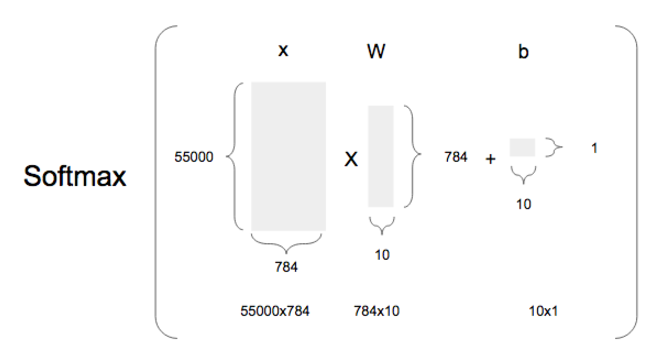
 w가 왜 784x10 이 될까? 생각해보자면, w는  column이 무엇이 되든 상관이 없다. 그러나 우리가 얻고자하는 마지막 label이 총 10차원을 가져야하므로 w의 행렬을 생각해줘서 784x10이 된 것이다.

In [4]:
# x는 input으로 값을 대입하는 placeholder 사용
x = tf.placeholder(tf.float32, [None, 784])

# W는 weight으로 학습하며 바뀌는 값이 되어야 하므로 Var
W = tf.Variable(tf.zeros([784,10]))

# W는 bias로 학습하며 바뀌는 값이 되어야 하므로 Var
b = tf.Variable(tf.zeros([10]))

# k는 임시 tensor
k = tf.matmul(x, W) + b

# y가 결국 학습한 데이터 모델
y = tf.nn.softmax(k)

- - -
# Cost 함수 정의 및 옵티마이저 정의
 cost가 무엇일까? 우리가 구하고자 하는 test의 label을 구하려면 먼저 train을 학습시켜야 한다. 이때, train의 data에서 실제 값까지 차이가 가장 작은 값을 구하여 학습시켜야 할 것이다. 즉 우리가 구하고자 하는 값(label)과 이미 train에서 주어진 값(label)의 차이가 cost이고, 이 차이가 가장 작은 값을 찾는 것이 우리의 목표이다.<br>
 Cost함수는 cross entropy 함수의 평균을 이용한다. 이를 알고 사용하면 더 좋겠지만, 먼저 tensorflow에는 이미 구현되어 있기 때문에 가져다 쓰도록 하자.
  - Cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(tf.matmul(x, W) + b, y__))
   - y_ 는 학습을 위해서 입력된 값이라 한다. 조금 이따가 전체적인 코드에서 한번 더 짚어보자.

optimizer는 코스트 함수의 최소값을 찾는 알고리즘이다. W와 b를 변화시키며 학습시키는 과정에서 w와 b를 어떤식으로 변화시킬지에 대한 알고리즘인 것이다. 이 알고리즘이 효과적일수록 학습속도가 빨라질 것이다.<br>
optimizer 알고리즘은 상황에 따라 여러가지를 사용할 수 있는데, 여기서는 경사 하강법(gradient descent) 라는 optimizer를 사용하겠다.

In [5]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])                                                                               

# Initailize learing_rate
learning_rate = 0.5

# cost 함수(cross entropy 함수의 평균)
# logit : input data로 도출한 값(계산한 값)
# labels : 임시 placeholder, 흔히 사용하는 tmp와 같은 개념이라 생각하면 될듯.
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = k, labels = y_))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



위의 코드를 이해해보자
- y_라는 임시 placeholder를 생성 후 learning_rate를 초기화. 실제 정답을 넣어줌(train data's label)
- cost 함수를 정의하는데, k를 softmax하여 y_랑 비교함(크로스 엔트로피 함수의 평균을 사용)
- cost를 가장 줄이는 방식으로 옵티마이즈를 한다. 이는 학습시 자동으로 계산되는 것이고, train_step이 학습 방법이다.

- - -
# model 학습
이제 model을 만들었으니 제대로 학습을 시켜야 한다. 55000개의 데이터가 있으니 처음부터 끝까지 학습시키는 방법도 존재하지만, 전체 데이터셋을 나누어 학습을 시키는 방법인 batch training 방법을 사용하도록 하겠다. 전체 데이터를 순차적으로 학습시키기에는 연산 비용이 비싸다는 단점이 존재하기 때문에 나누어서 계산하는 방식을 채택한 것으로 보인다. 물론 여기서는 55000개의 데이터밖에 없기 때문에 한번에 연산이 가능할 뿐만 아니라 연산이 많지는 않지만 예제 차원에서 사용한 것 같다.

In [8]:
print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)
for _ in range(1000):
    # 1000번씩, 전체 데이타에서 100개씩 뽑아서 트레이닝을 함.  
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

print ('b is ',sess.run(b))
print('W is',sess.run(W))

Training

b is  [-0.36849245  0.35696268  0.09887183 -0.26524374  0.03734065  1.299802
 -0.09597518  0.616639   -1.4173898  -0.26251563]
W is [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


batch_xs는 데이터 images, batch_ys는 데이터 labels이다.<br>
k = x * W + b 에서, x에는 batch\_xs, y\_에 batch\_ys를 넣고 옵티마이즈를 통하여 cost를 줄여가는 방식이다. k와 y\_를 비교하며 계속하여 학습시키며 weight와 bias를 조정해가는 방식이다.<br>
결과적으로는 W와 b가 계속하여 학습되며 cost가 줄어든다. 마지막까지 학습시킨 W와 b를 통하여 이제 test dataset으로 결과값을 도출하여 확인하면 된다.

- - -
# model 검증

In [38]:
print ("Testing model")
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
print(sess.run(correct_prediction, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

# mean값 도출
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('accuracy ',sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print ("done")

Testing model
[ True  True  True ...  True  True  True]
accuracy  0.9166
done


- correct\_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y\_, 1))
 * argmax(y, 1) 는 y행렬에서의 각 행에서 가장 큰 값의 index를 리턴해준다.
   + argmax의 parameter중 첫번째는 행렬, 두번째는 어느 축으로 카운트할 것인지에 대한 flag
 * y의 최대 index(예측한 숫자)와 y\_의 최대 index(정답)

- - -
 ## MNIST(Use softmax) 요약
 1. k = x * W + b
 2. y = softmax(k)
 3. y_ = train data의 label
 4. cross entropy 방법을 통한 cost 추출
 5. optimize는 gradient descent 방법을 사용 후 train data 학습(W, b를 얻어냄)
 6. 학습한 W, b를 통해 test data로 값을 추출하고 accuracy 계산